# Lab Assignment One: Exploring Table Data

##### Sian Xiao

## 1. Business Understanding

### 1.1 Data Source

This dataset is selected from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Wine+Quality. It's originally published on *Decision Support Systems* in 2009 (https://doi.org/10.1016/j.dss.2009.05.016).
It contains two datasets related to red and white variants of the Portuguese "Vinho Verde" wine (a unique product from the Minho (northwest) region of Portugal), size of each is 1599 for red wine and 4898 for white wine. This dataset can be used to predict the quality of wine with their physicochemical indice.

### 1.2 Data Significance

According to Oxford Dictionary, quality is "the standard of something as measured against other things of a similar kind; the degree of excellence of something". There are a few approaches to score wine: a discrete quality level terminology (poor, acceptable, good, very good, outstanding); a "star" system (five star scoring system); 100-credit or 20-credit scale. (https://wineandotherstories.com/the-six-attributes-of-quality-in-wine/) The United States consumes the largest volume of wine of any country, at 33 million hectoliters in 2020 (https://www.statista.com/statistics/858743/global-wine-consumption-by-country/), so this is a large market. The significance of predicting wine quality needs to be emphasized.
* From the customers' side, the poor quality wines may damage people's health for their arsenic and excessive sugar (https://www.thedailymeal.com/drink/when-cheap-wine-just-isnt-worth-it).
* The quality of wine decides their prices and the company definitely hope to give a suitable price. If it's much higher, the company's reputation will be damaged; if it's much lower, the company's profit will be damaged.
* Obtaining reasonable wine quality can be used to target specific customers, design specific marketing strategy, compare with suitable competing products.
* Predicting quality can be used to filter the low quality products to ensure the product quality and improve customer satisfaction, to further keep old customers and attract new customers. Well-done product quality control can even increase the sales of other products.


The quality is usually determined by a professional, well-trained wine expert. Sometimes, we watch the competition that critics blindly taste the wine to give a comment and take a guess from a movie or TV program. However, this is not feasible for the wine industry. First, massive annual yield and consumption makes it impossible to taste them. Second, the majority of wine is normal quality (those experts just show up for the excellent ones) and there is no need to taste them one by one. Third, the decision of quality by experts is subjective and hard to quantified in that different experts give different values so it has no universal and decisive criteria but replies mainly on human experts. Also, taste is the least understood of the human senses (according to one citation in this paper).
Many measurements of physicochemical properties are easy and cheap with modern techniques (as a PhD student in Chemistry I'm confident about this), and these properties are related to the quality of wines. If we could use them as input to get quality as output, we won't worry about the above concerns: the process becomes easy and objective!

In conclusion, our task is to use physicochemical properties to train a model, and predict or, to say, calculate the quality of wines. The specific companies would be interested for two reasons: they can easily provide this data and they are desired to rank their products with quality to price them.

### 1.3 Data Summary

As UCI website said "Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)." The donated dataset contains 12 attributes, among which 11 are input variables based on physicochemical tests and 1 is output variable based on sensory data. Type, scales, and range of attributes are shown in the table below.

|    | Attributes           | Scales  | Discrete/Continuous | Range           |
|----|----------------------|---------|---------------------|-----------------|
| 1  | fixed acidity        | ratio   | continuous          | 3.8-15.9        |
| 2  | volatile acidity     | ratio   | continuous          | 0.08-1.58       |
| 3  | citric acid          | ratio   | continuous          | 0-1.66          |
| 4  | residual sugar       | ratio   | continuous          | 0.6-65.8        |
| 5  | chlorides            | ratio   | continuous          | 0.009-0.611     |
| 6  | free sulfur dioxide  | ratio   | continuous          | 1-289           |
| 7  | total sulfur dioxide | ratio   | continuous          | 6-440           |
| 8  | density              | ratio   | continuous          | 0.98711-1.03898 |
| 9  | pH                   | ratio   | continuous          | 2.72-4.01       |
| 10 | sulphates            | ratio   | continuous          | 0.22-2          |
| 11 | alcohol              | ratio   | continuous          | 8-14.9          |
| 12 | quality              | ordinal | discrete            | 3-9             |

### 1.4 Measure of Success

This dataset can be viewed as classification or regression tasks.

If we treat it as a regression task: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Squared Mean Error (RMSE), correlation coefficient R (and R Square definitely) are common metrics. The higher the correlation coefficient and the smaller the errors, the better performance a model has. In this case, if we set a tolerance factor as 0.5, the predicted value should be within deviation of 0.5 compared to the real value.

If we treat it as a classification or regression task, we need to consider whether it's a multi-class or binary classification. If we treat it as a multi-class classification, in this case, the predicted value should be the real value (similar to previous tolerance factor of 0.5, since this is a discrete value in classification from 0 to 10, 1 is really large). If we treat it as a binary classification, we set the quality as good/bad and the predicted category should just be the real one. We can use confusion matrix to visualize and evaluate the performance of classification models. The indicators commonly used are precision, accuracy, recall (or sensitivity) and specificity.

|                    | Real positive       | Real negative       |
|--------------------|---------------------|---------------------|
| Predicted positive | True positive (TP)  | False negative (FN) |
| Predicted negative | False positive (FP) | True negative (TN)  |

## 2. Data Understanding

The first thing to do is to import some necessary libraries in explore table data.

In [1]:
# import some necessary libraries in explore table data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### 2.1 Data Preparation

The task of this part is to load the dataset into two `pd.DataFrames`, named as `df_red_origin` and `df_white_origin`.

In [2]:
df_red_origin = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
df_white_origin = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)

### 2.2 Data Quality

First, we will give some basic information about the dataset and check whether there are any missing values.

In [3]:
print(df_red_origin.info())
print(df_white_origin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   

In [4]:
print(df_red_origin.isna().sum())
print(df_white_origin.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Great! It looks that there is no missing value in the dataset (I'm lucky considering you said 90% of repositories in UCI ML Repository have missing data), which is in line with the introduction of the dataset. I don't want to randomly delete some data to show my imputation skills here.

**Is it true that we don't have missing data?** Do we have weird data which is actually something crazy? As far as I can tell, all the data can be reasonable, so we treat it as complete dataset.

Anyway, we don't need to impute missing data here, so let's check the duplication.

In [5]:
print(df_red_origin.duplicated().sum())
print(df_white_origin.duplicated().sum())

240
937


There are a lot of duplicate entries detected by `pandas` in the dataset. **Are they duplicates and do we drop them?** In my opinion, we should drop them and here is my reason. The data type of all 11 variables (excluding quality) is `float64`, possibility that all 11 variables are the same is too small. As a Chemistry major student, I can't believe in experimental situation we get same data for different samples. Thus, these duplicated values must come from human error. Let's drop them and go on.

In [6]:
df_red_origin = df_red_origin.drop_duplicates()
df_white_origin = df_white_origin.drop_duplicates()

In [7]:
print(df_red_origin.info())
print(df_white_origin.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   

Now that we drop the duplicate entries, we can summarize the real data.

In [8]:
print(df_red_origin.describe())
print("========================================================================")
print(df_white_origin.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

Based on the above table, we might give a guess there are outliers in many features. We don't need to discuss here, we will do it later.
Let's check the distribution of quality.

In [9]:
print(df_red_origin.quality.value_counts())
print(df_white_origin.quality.value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64


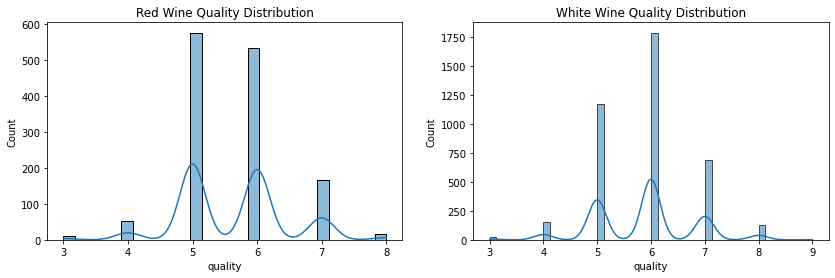

In [10]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_red_origin.quality, kde=True)
plt.title("Red Wine Quality Distribution")
plt.subplot(1, 2, 2)
sns.histplot(df_white_origin.quality, kde=True)
plt.title("White Wine Quality Distribution")
plt.show()

The quality of red wine is in the range of 3 to 8, and that of white wine is 3 to 9. The majority lies in range 5 to 7, which means the quality is not balanced (e.g. there are munch more normal wines than excellent or poor ones).

Let's convert the quality into qualified and unqualified using classic Pass/Fail strategy as exams (our favorite!). I would like to replace the quality with eligibility (wine with quality larger than or equal to 6 will pass our exam and be marked as eligible, which will have value 1 in eligibility, others will be marked as 0). This would turn our problem from multi-class classification or regression into binary classification. They will become two new `pd.DataFrame` named as `df_red`, `df_white`.

In [11]:
# need to check the replace
df_red = df_red_origin.copy()
df_red.quality = df_red_origin.quality.replace(to_replace=[3, 4, 5, 6, 7, 8],
                                               value=[0, 0, 0, 1, 1, 1])
df_white = df_white_origin.copy()
df_white.quality = df_white_origin.quality.replace(to_replace=[3, 4, 5, 6, 7, 8, 9],
                                                   value=[0, 0, 0, 1, 1, 1, 1])
df_red = df_red.rename(columns={'quality': 'Eligibility'})
df_white = df_white.rename(columns={'quality': 'Eligibility'})
print(df_red.Eligibility.value_counts())
print(df_white.Eligibility.value_counts())

1    719
0    640
Name: Eligibility, dtype: int64
1    2613
0    1348
Name: Eligibility, dtype: int64


For red wine, the eligibility is respectively balanced. But for white wine, amount of qualified instances is almost twice as much as that of unqualified instances. We might give a guess that white wine has higher possibility to be qualified.

In [12]:
df_red.columns = ['FA', 'VA', 'CA', 'RS', 'Clorides', 'FSO2',
                  'TSO2', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Eligibility']
df_white.columns = ['FA', 'VA', 'CA', 'RS', 'Clorides', 'FSO2',
                    'TSO2', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Eligibility']

I renamed the features.

## 3. Data Visualization

Here is my thought about two datasets. I'm trying to combine they two, so I plot the correlation heat map to see whether they have similar feature correlation within their own dataset.

Also, **what correlation would be found and how to interpret them?**

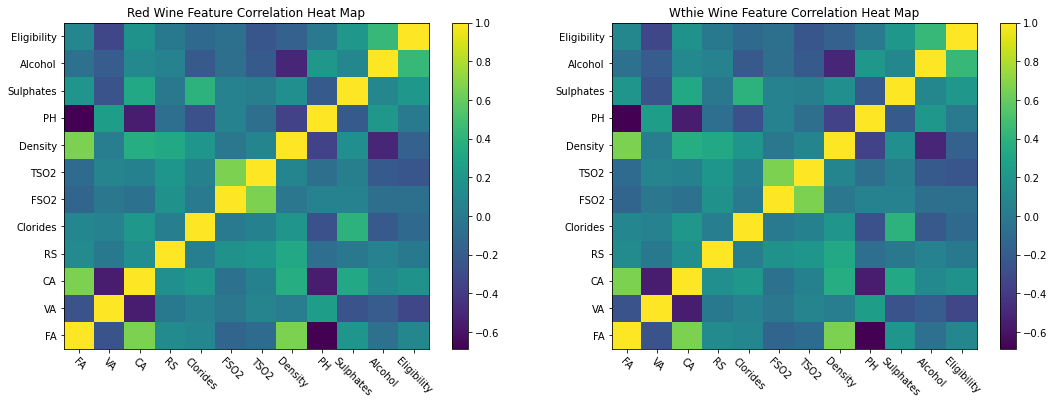

In [13]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
vars_to_use = df_red.columns
plt.pcolor(df_red.corr())
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use, rotation='315')
plt.colorbar()
plt.title("Red Wine Feature Correlation Heat Map")

plt.subplot(1, 2, 2)
vars_to_use = df_white.columns
plt.pcolor(df_red.corr())
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use, rotation='315')
plt.colorbar()
plt.title("Wthie Wine Feature Correlation Heat Map")

plt.show()

I'm not good at recognizing colors for these colors, so let's try `seaborn` to draw a heat map with correlation data. The palette comes from this website https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/. The palette looks better for me.

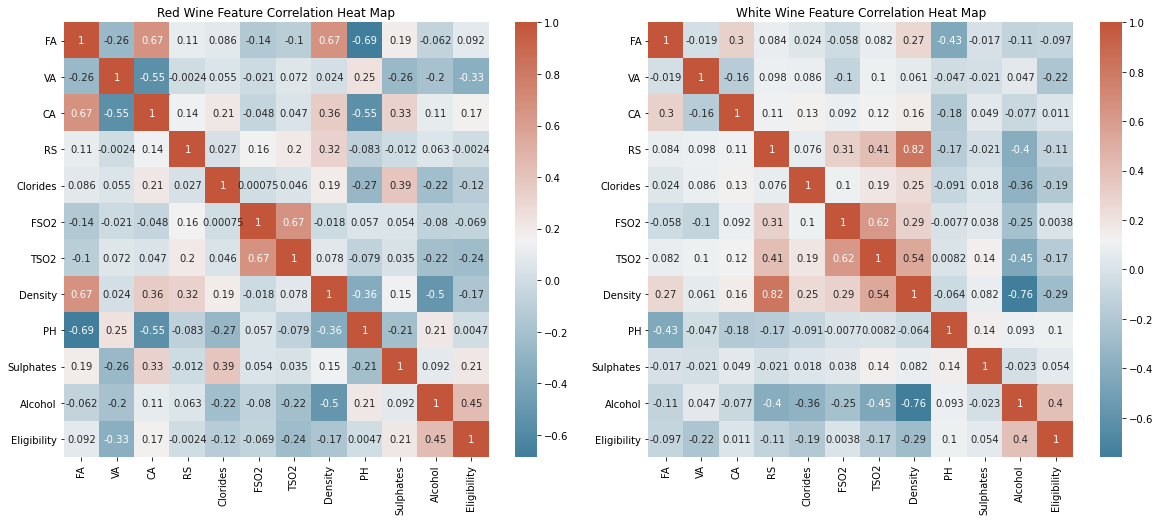

In [14]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
sns.heatmap(df_red.corr(), annot=True, cmap=cmap)
plt.title("Red Wine Feature Correlation Heat Map")
plt.subplot(1, 2, 2)
sns.heatmap(df_white.corr(), annot=True, cmap=cmap)
plt.title("White Wine Feature Correlation Heat Map")

plt.show()

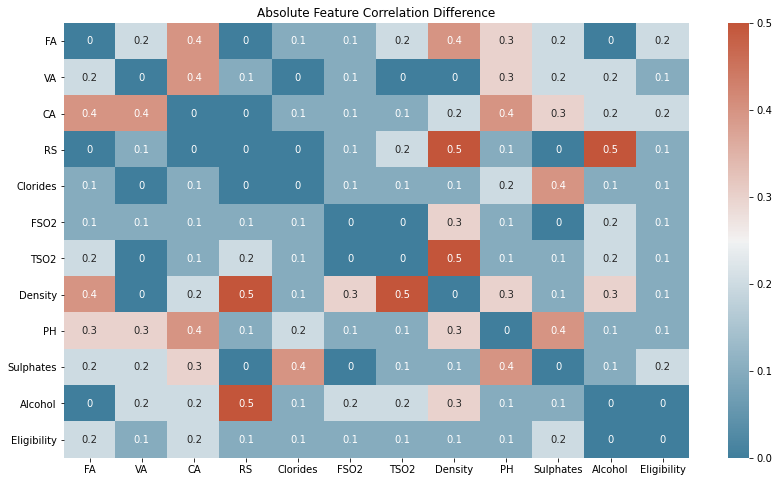

In [15]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(14, 8))

sns.heatmap(round(abs(df_red.corr()-df_white.corr()), 1),
            annot=True, cmap=cmap)
plt.title("Absolute Feature Correlation Difference")

plt.show()

From my point of view, red wine and white wine share similarity, to some extent, in feature correlation. Let's combine the data of red wine and white wine to see the result. Before combining, we should first add a column to indicate which kind of wine they are. `df` is obtained from these two steps.

In [16]:
df_red['Type'] = 'R'
df_white['Type'] = 'W'

In [17]:
df_origin = pd.concat([df_red, df_white])
df_origin

FA    VA    CA   RS  Clorides  FSO2   TSO2  Density    PH  Sulphates  \
0      7.4  0.70  0.00  1.9     0.076  11.0   34.0  0.99780  3.51       0.56   
1      7.8  0.88  0.00  2.6     0.098  25.0   67.0  0.99680  3.20       0.68   
2      7.8  0.76  0.04  2.3     0.092  15.0   54.0  0.99700  3.26       0.65   
3     11.2  0.28  0.56  1.9     0.075  17.0   60.0  0.99800  3.16       0.58   
5      7.4  0.66  0.00  1.8     0.075  13.0   40.0  0.99780  3.51       0.56   
...    ...   ...   ...  ...       ...   ...    ...      ...   ...        ...   
4893   6.2  0.21  0.29  1.6     0.039  24.0   92.0  0.99114  3.27       0.50   
4894   6.6  0.32  0.36  8.0     0.047  57.0  168.0  0.99490  3.15       0.46   
4895   6.5  0.24  0.19  1.2     0.041  30.0  111.0  0.99254  2.99       0.46   
4896   5.5  0.29  0.30  1.1     0.022  20.0  110.0  0.98869  3.34       0.38   
4897   6.0  0.21  0.38  0.8     0.020  22.0   98.0  0.98941  3.26       0.32   

      Alcohol  Eligibility Type  
0         9.4            0    R  
1         9.8            0    R  
2         9.8            0    R  
3         9.8            1    R  
5         9.4            0    R  
...       ...          ...  ...  
4893     11.2            1    W  
4894      9.6            0    W  
4895      9.4            1    W  
4896     12.8            1    W  
4897     11.8            1    W  

[5320 rows x 13 columns]

We combine 1359 red wine instances and 3961 white wine instances to get 5320 wine instances. Let's draw the correlation heat map again to see if the correlation changes a lot.

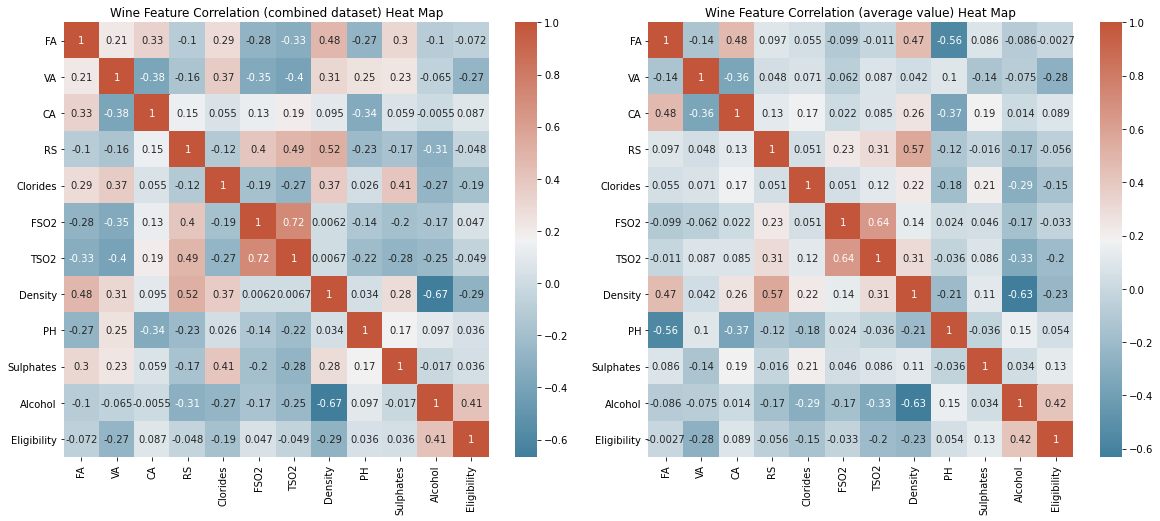

In [18]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
sns.heatmap(df_origin.corr(), annot=True, cmap=cmap)
plt.title("Wine Feature Correlation (combined dataset) Heat Map")
plt.subplot(1, 2, 2)
sns.heatmap((df_red.corr()+df_white.corr())/2, annot=True, cmap=cmap)
plt.title("Wine Feature Correlation (average value) Heat Map")

plt.show()

I can't understand why correlation between some features changed a lot, some even changed signs. Let's draw a change heat map with absolute value rounded to tenths decimal.

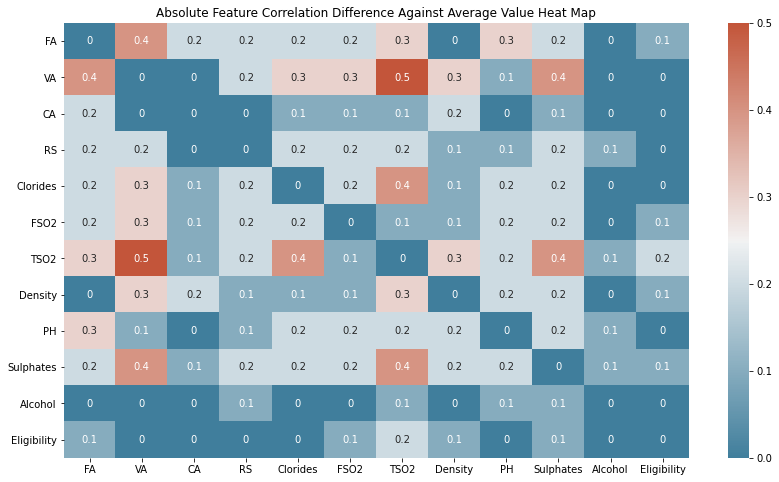

In [19]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(14, 8))

sns.heatmap(round(abs(df_origin.corr()-(df_red.corr() +
            df_white.corr())/2), 1), annot=True, cmap=cmap)
plt.title("Absolute Feature Correlation Difference Against Average Value Heat Map")

plt.show()

We can see that the correlation between eligibility and alcohol and other features didn't change a lot, so they are stable for two wines, so alcohol is an important feature for both wines. On the contrary, the correlation of `FA`/`VA`, `TSO2`/`VA`, `TSO2`/`Sulphates` changed a lot. In my opinion, this gives a conclusion that red wine and white wine differ in these fields, which result in the different tastes (comes from someone who don't understand wines).

In this case, I'm wondering if I should continue with combined data. However, it's not a classification assignment (the feature `Type` will give a weight value to guide the model), we can use visualization to show the differences! Awesome!

**We can see that `FSO2` and `TSO2` are highly positive correlated. As free sulfur dioxide is part of total sulfur dioxide, this makes sense. While `Density` and `Alcohol` are highly negative correlated. As we all know, density of alcohol is smaller than density of water, and the density of mixture decreases with alcohol content, this makes sense too.** Let's delete `FSO2` and `Density` and plot it again.

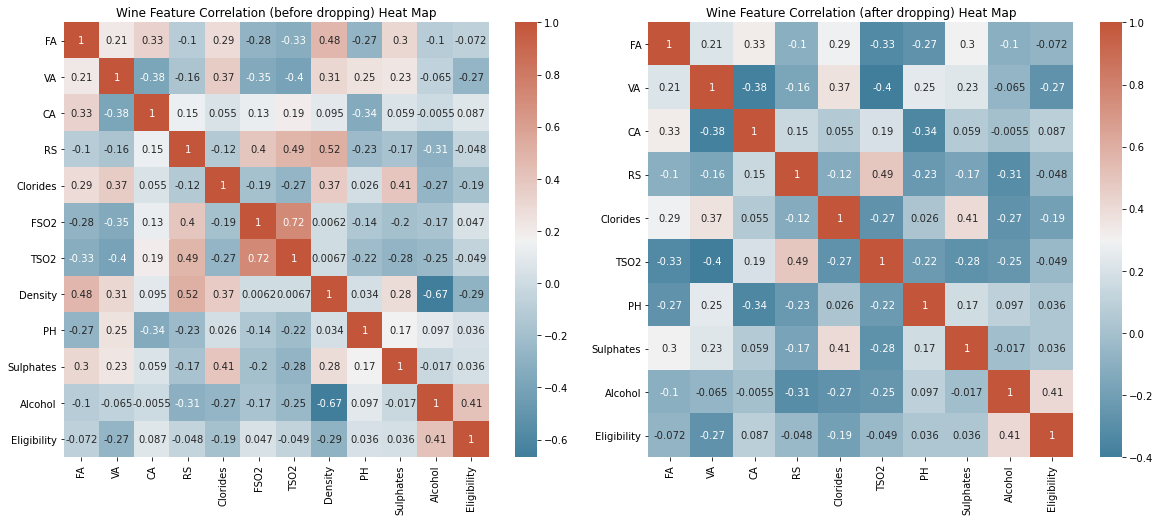

In [20]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
sns.heatmap(df_origin.corr(), annot=True, cmap=cmap)
plt.title("Wine Feature Correlation (before dropping) Heat Map")

df = df_origin.copy()
del df['FSO2']
del df['Density']

plt.subplot(1, 2, 2)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.title("Wine Feature Correlation (after dropping) Heat Map")

plt.show()

We can see `VA` is relatively highly negatively correlated with `Eligibility`, that's because wine fermentation is a chemical process that turns raw materials into alcohol, but it can further turns to acid. So the wine with high `VA` would be like vinegar and has low quality. While `Chlorides` is related with salt (it's anions of salt), and high content of salt would damage wine quality, so it has a negative correlation with `Eligibility`.

In [21]:
df_group1 = df.groupby(by=['Type', 'Eligibility'])
df_group1.Eligibility.count()

Type  Eligibility
R     0               640
      1               719
W     0              1348
      1              2613
Name: Eligibility, dtype: int64

Eligibility     False     True 
Type                           
R            0.470935  0.529065
W            0.340318  0.659682


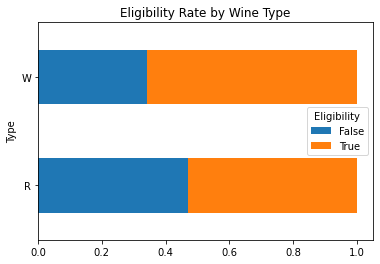

In [22]:
Eli = pd.crosstab(df['Type'], df.Eligibility.astype(bool))
Eli_rate1 = Eli.div(Eli.sum(1).astype(float), axis=0)  # normalize the value
print(Eli_rate1)

Eli_rate1.plot(kind='barh', stacked=True)
plt.title('Eligibility Rate by Wine Type')
plt.show()

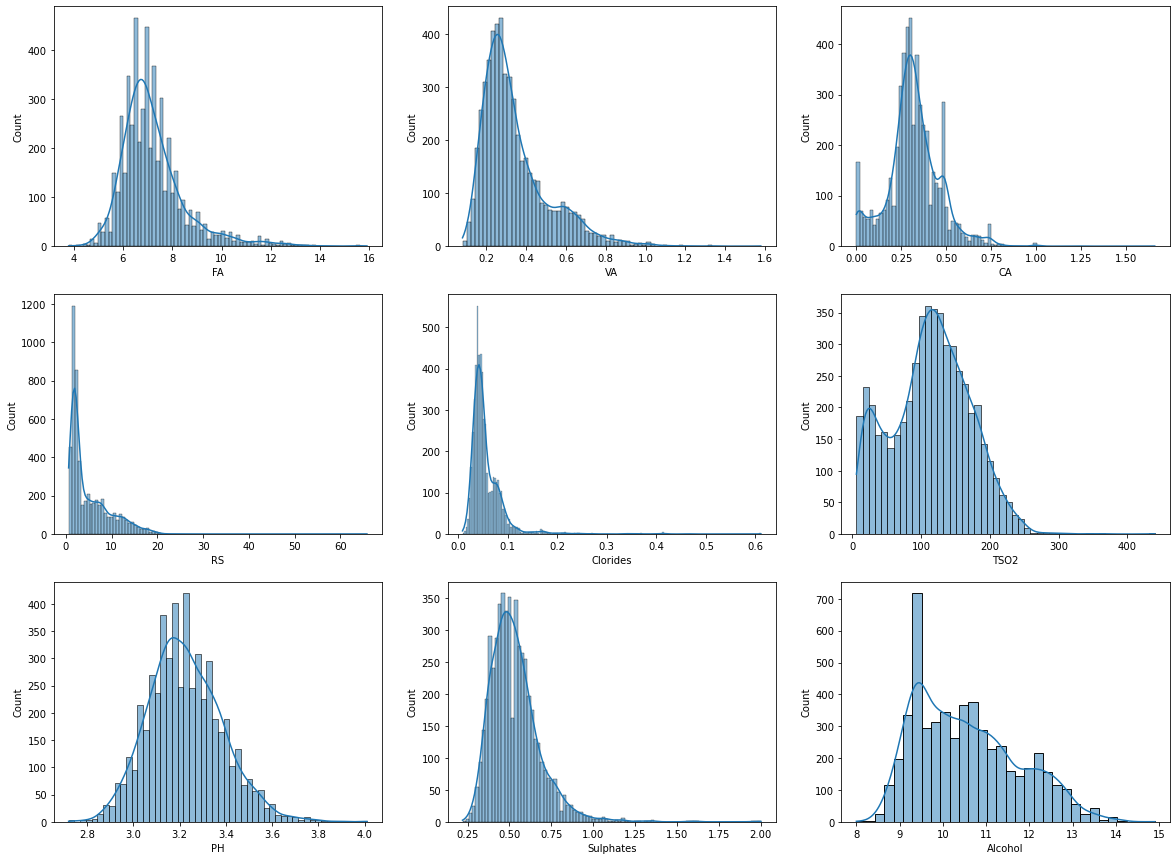

In [23]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-2], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)

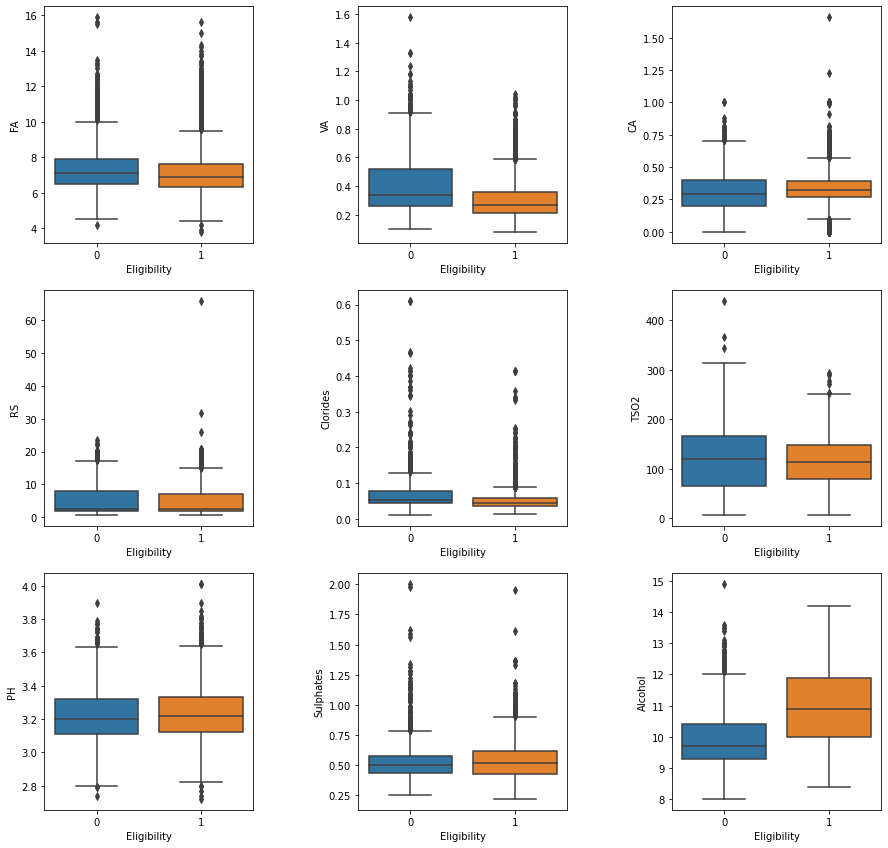

In [24]:
plt.figure(figsize=(15, 20))

plt.subplots_adjust(wspace=0.5)
for i, column in enumerate(df.columns[:-2], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x="Eligibility", y=column, data=df)

plt.show()

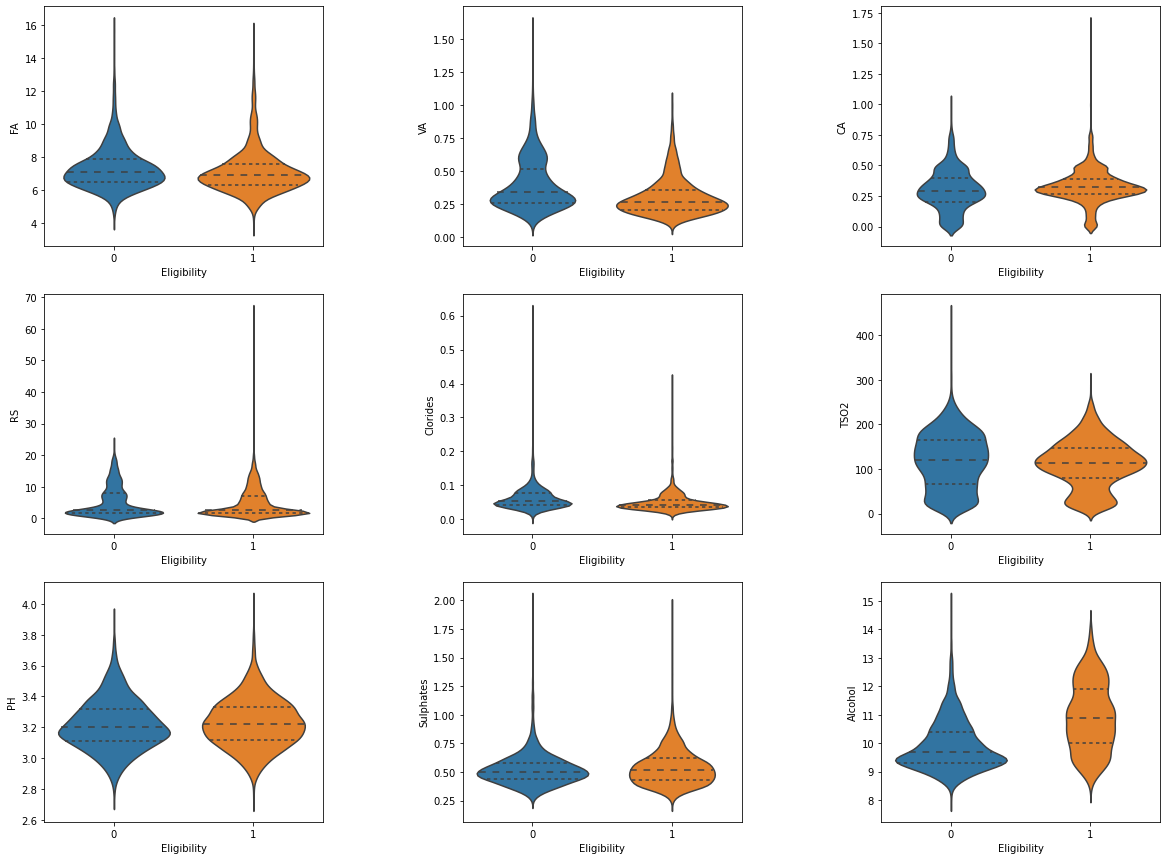

In [25]:
plt.figure(figsize=(20, 15))

plt.subplots_adjust(wspace=0.5)
for i, column in enumerate(df.columns[:-2], 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x="Eligibility", y=column, data=df, inner="quart")

plt.show()

From the three plots above  many features have long tails, such as `FA`, `CA`, `RS`, `Chlorides`, `Sulphates`, indicating outliers.

Most of features share similar distribution for both qualified and unqualified. However, it's easy to notice the distribution of alcohol is remarkably different. Recall that alcohol has a stable correlation with quality. **Does higher alcohol content result to better quality?**

(9, 10]     1863
(10, 11]    1434
(11, 12]     938
(12, 13]     631
(8, 9]       340
(13, 14]     109
(14, 15]       3
Name: Alcohol, dtype: int64


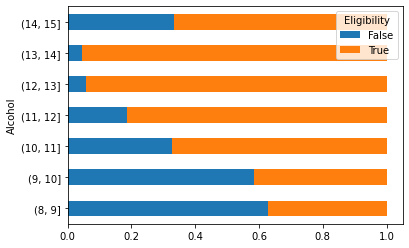

In [26]:
df_copy1 = df.copy()
# alcohol range: 8-14.9
df_copy1.Alcohol = pd.cut(df.Alcohol, [8, 9, 10, 11, 12, 13, 14, 15])
print(df_copy1.Alcohol.value_counts())

df_copy1_group = df_copy1.groupby(by=['Alcohol'])

Eli_rate2 = pd.crosstab(df_copy1.Alcohol, df_copy1.Eligibility.astype(bool))
Eli_rate2 = Eli_rate2.div(Eli_rate2.sum(1).astype(float), axis=0)

Eli_rate2.plot(kind='barh', stacked=True)
plt.show()

**We can easily see that Eligibility rate increased with the alcohol!** The samples in (14,15] are only three so we don't count it. Then our conclusion is that alcohol content is important.

Next, we can plot against red and white wine.

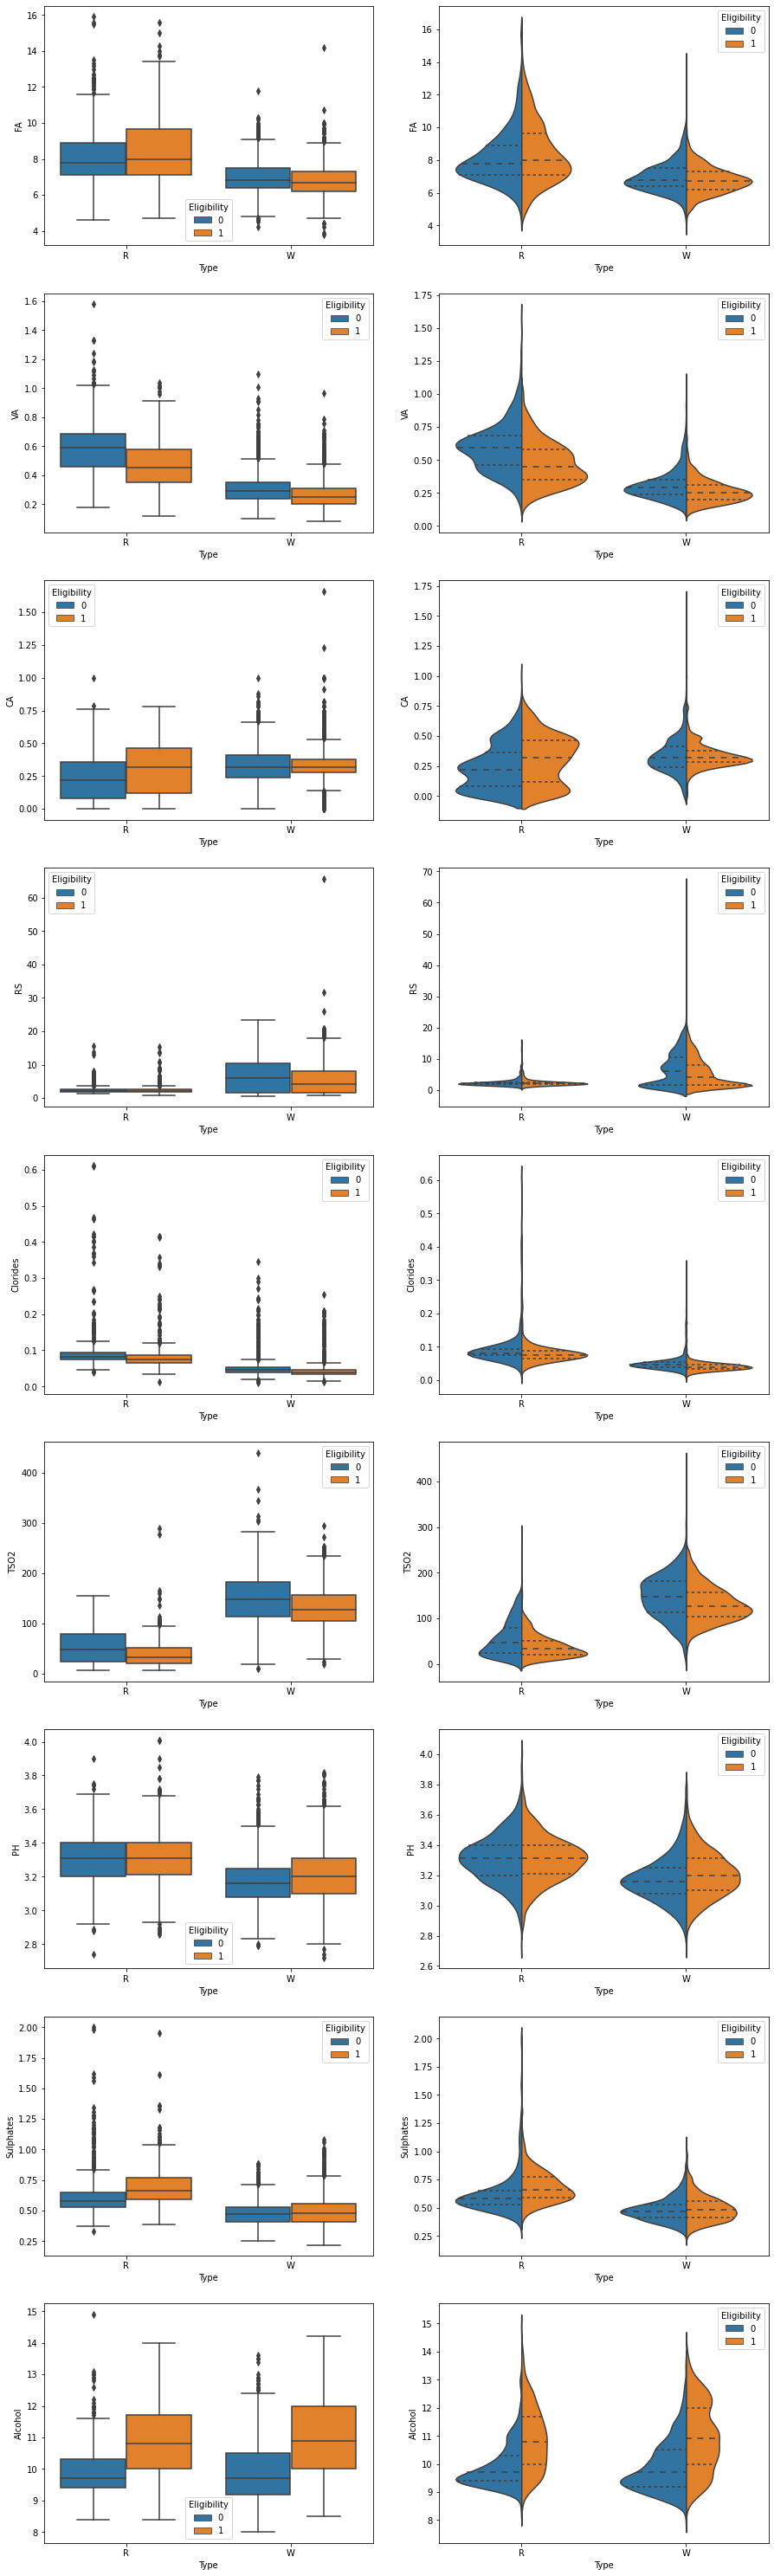

In [27]:
plt.subplots(figsize=(15, 60))

for i, column in enumerate(df.columns[:-2], 1):
    plt.subplot(len(df.columns)-1, 2, i*2+1)
    sns.boxplot(x='Type', y=column, hue="Eligibility", data=df)
    plt.subplot(len(df.columns)-1, 2, i*2+2)
    sns.violinplot(x='Type', y=column, hue="Eligibility",
                   data=df, inner="quart", split=True)

plt.show()

We can see that red wine and white wine differs a lot in `VA` and `TSO2`. These might help to predict wine type. **Can we use the dataset to predict whether it's red wine or white wine with only data?**

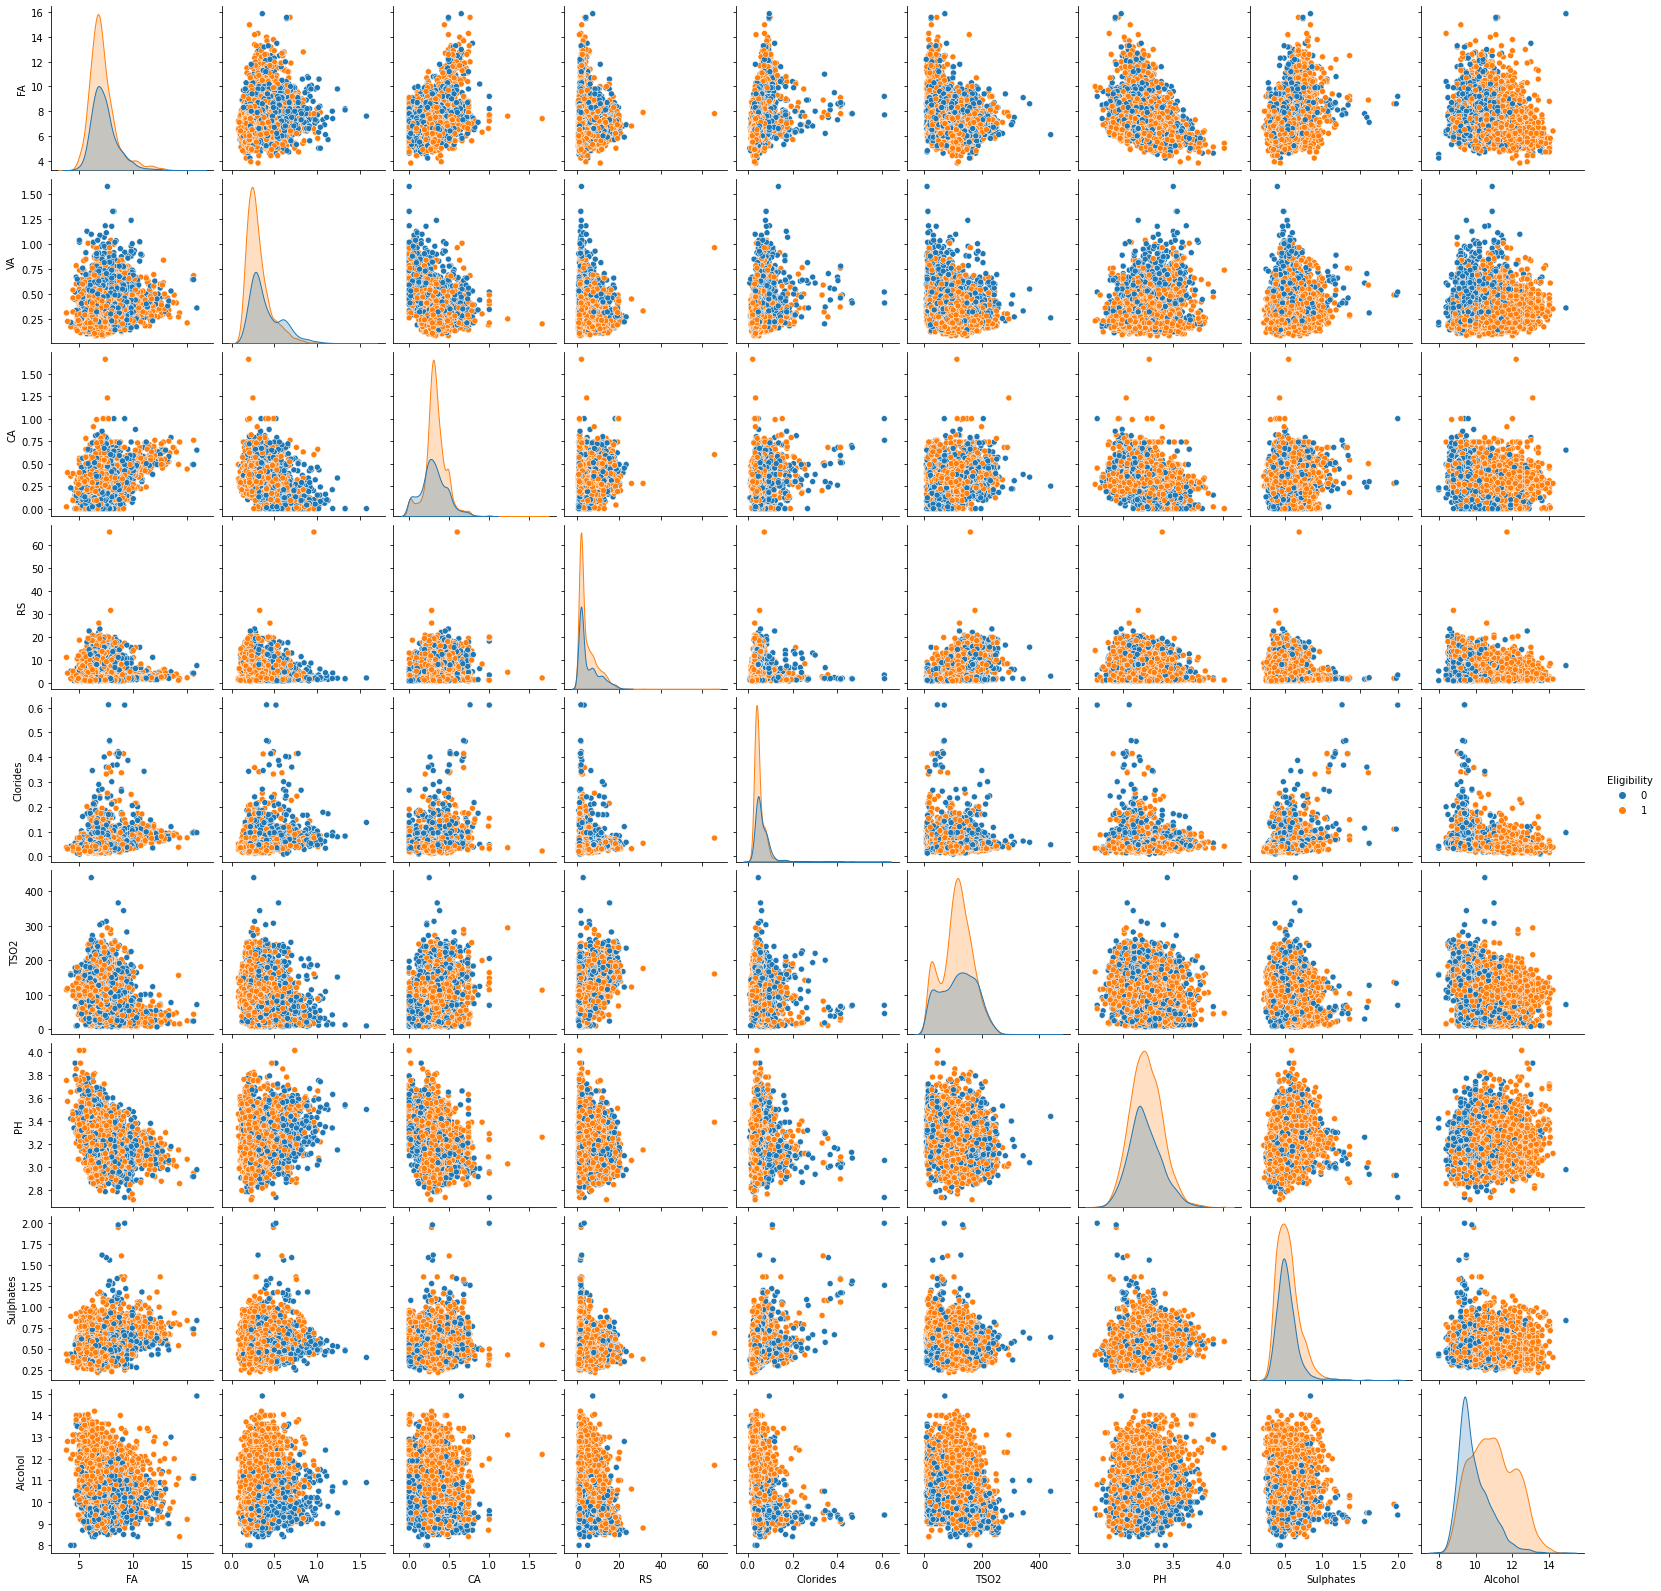

In [28]:
sns.pairplot(df, hue='Eligibility')
plt.show()

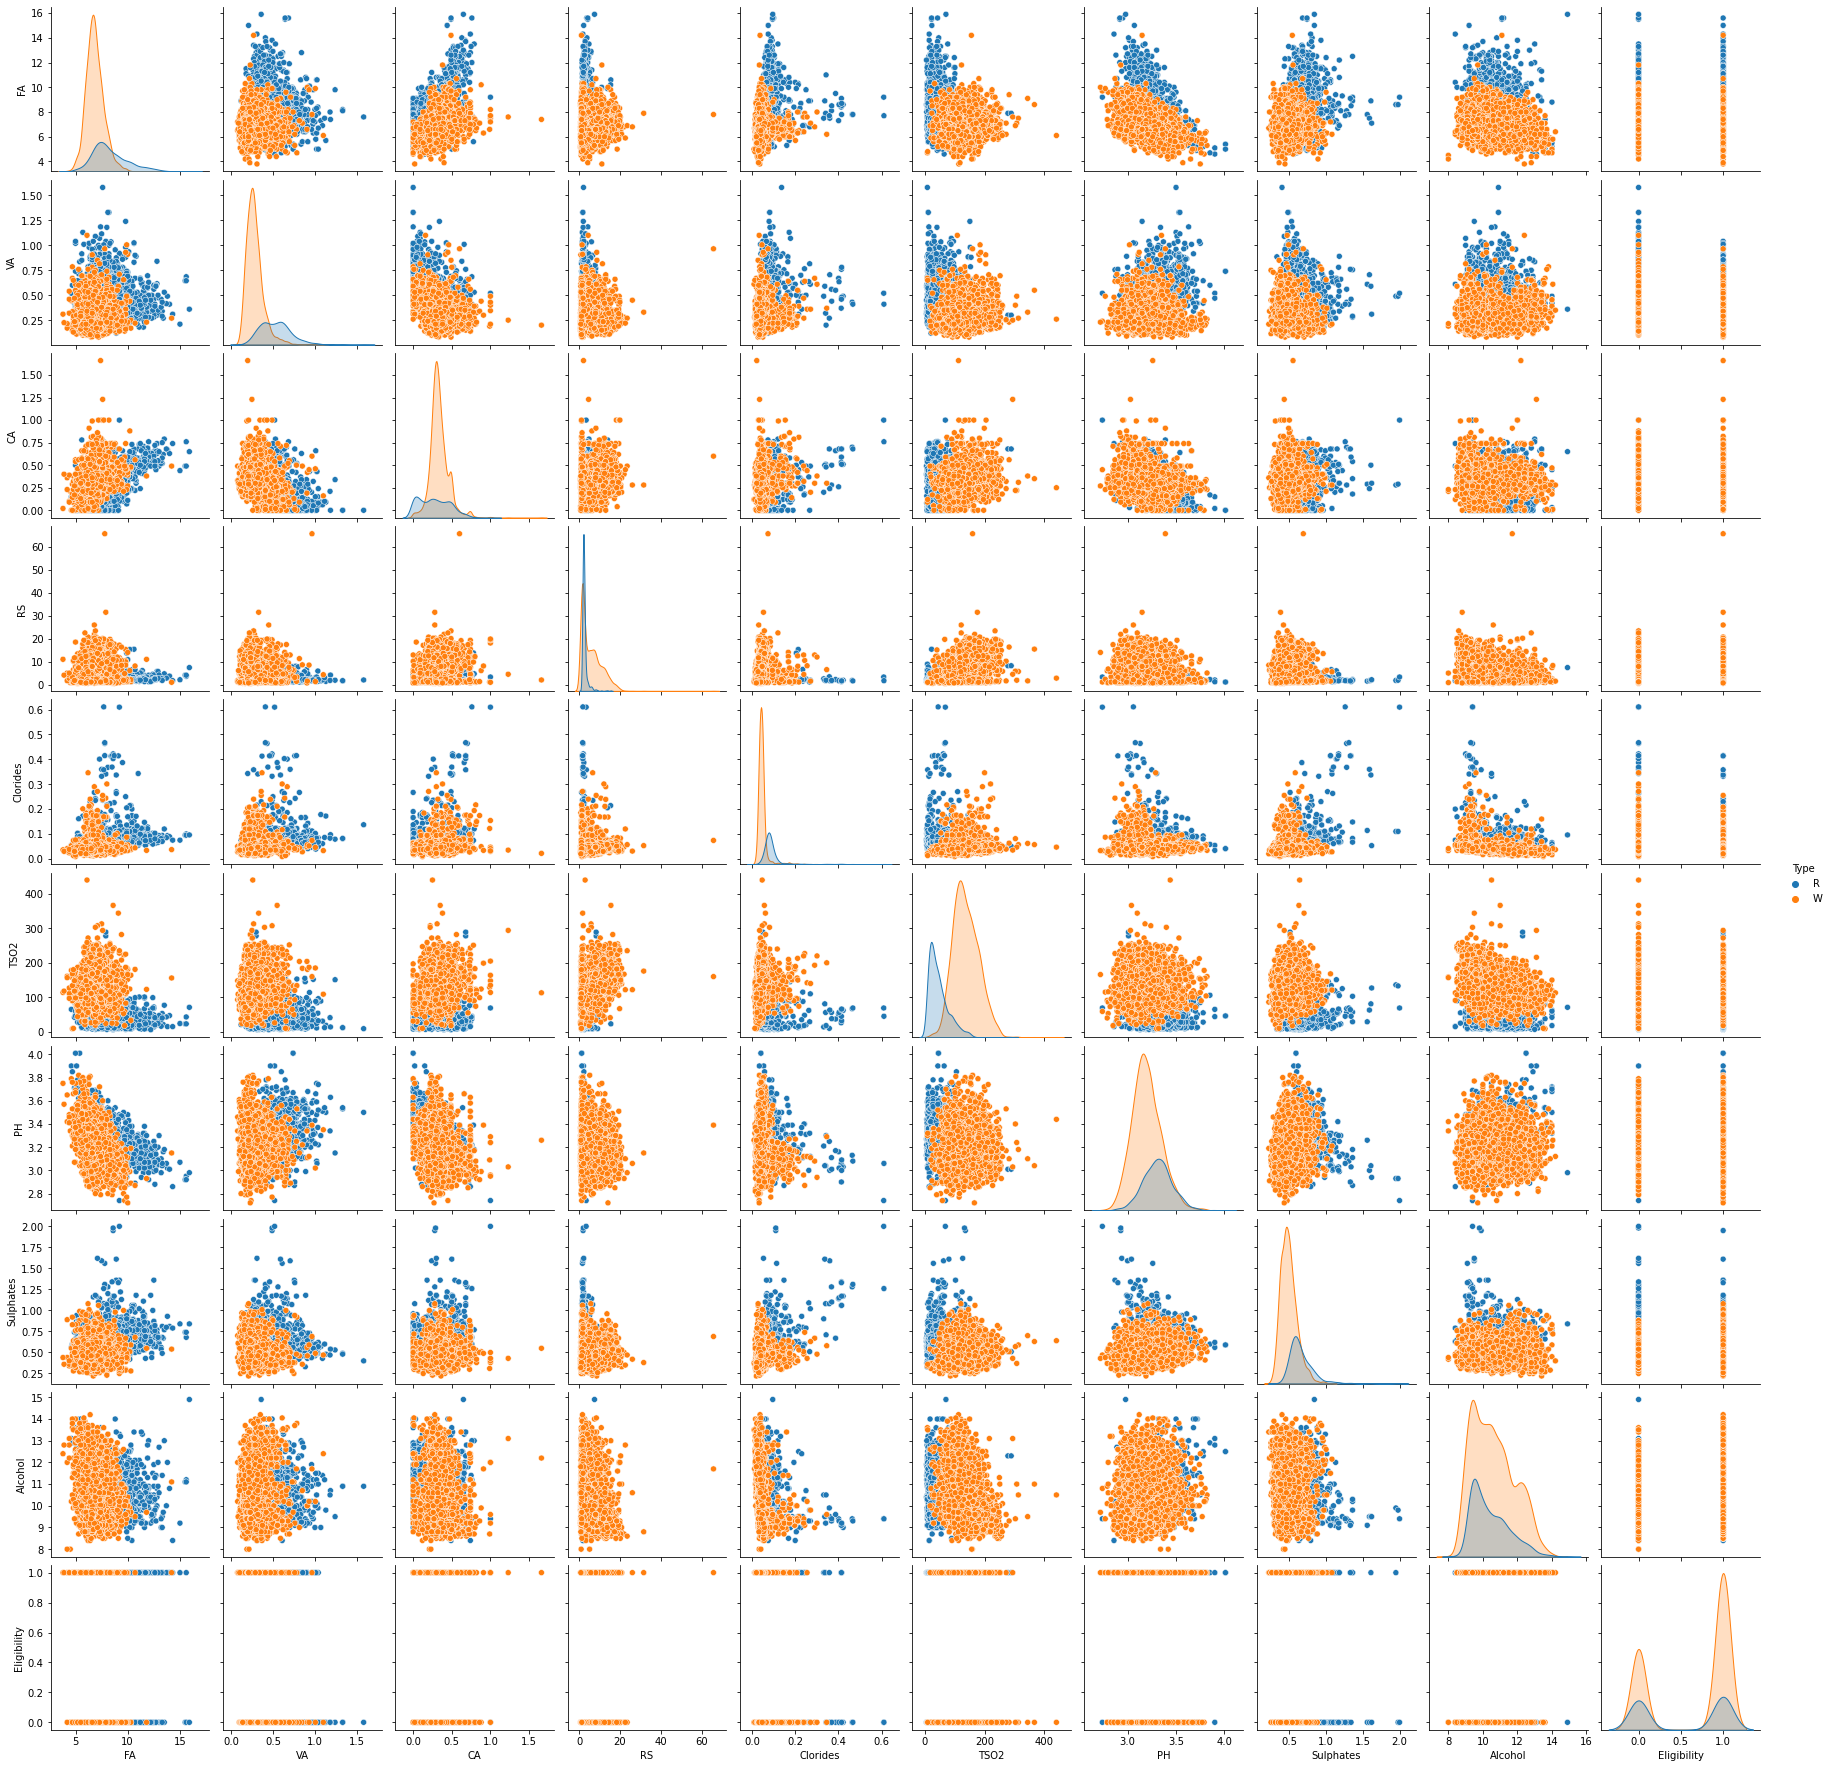

In [29]:
sns.pairplot(df, hue='Type')
plt.show()

These features are not very good classifiers so we can use principal component reduction (PCA) to transform the features into two principle components and plot them in two dimensions.

## 4. Dimensionality Reduction

### 4.1 Dimensionality Reduction Introduction
Dimension reduction plays an important role in data science, being a fundamental technique in both visualization and as pre-processing for machine learning.

### 4.2 UMAP
UMAP is short for Uniform Manifold Approximation and Projection for Dimension Reduction. It is a novel manifold learning technique for dimension reduction, theoretically based on manifold theory and topological data analysis. (https://arxiv.org/pdf/1802.03426.pdf)

In [30]:
import umap
import umap.plot

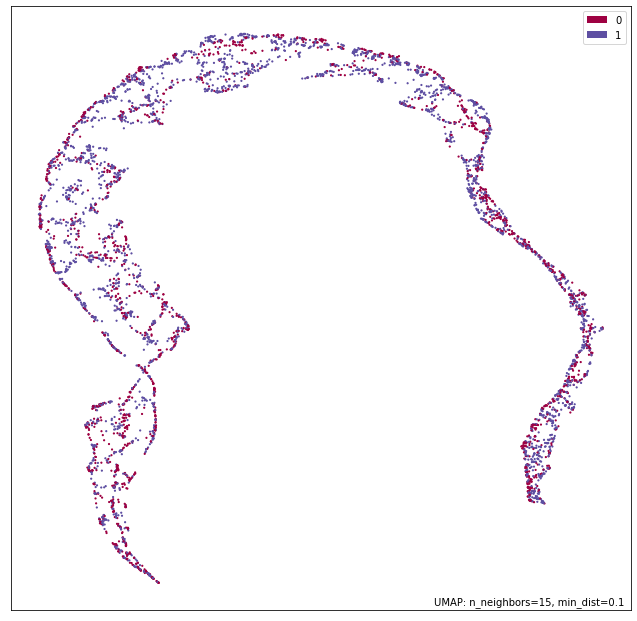

In [31]:
df_copy2 = df.copy()
df_copy2.Type = df.Type.replace(to_replace=['R', 'W'], value=[0, 1])

mapper = umap.UMAP().fit(df_copy2)
umap.plot.points(mapper, labels=df_copy2.Eligibility)
plt.show()

The dimension is reduced from to 2, the two dimension is plotted above, we can see different eligibility falls to different ends. But the boundary it not that clear, which might comes from poor original features.

https://wineandotherstories.com/the-six-attributes-of-quality-in-wine/ provides some criteria. "In white wines, acidity and alcohol/sugar should match; if the acidity is not enough compared to the wine’s sweetness level, the drink will appear cloying. For reds, tannins, acidity and alcohol should all be in balance." Let's try to use only alcohol and acidity as input.

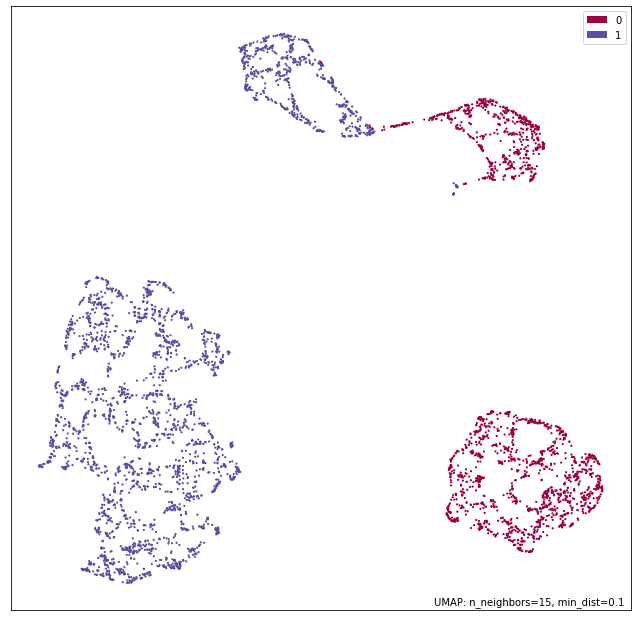

In [32]:
# selected features with Type
df_copy3 = df[['Alcohol', 'Eligibility', 'FA', 'CA', 'VA', 'Type']].copy()
df_copy3.Type = df.Type.replace(to_replace=['R', 'W'], value=[0, 1])

mapper = umap.UMAP().fit(df_copy3)
umap.plot.points(mapper, labels=df_copy3.Eligibility)
plt.show()

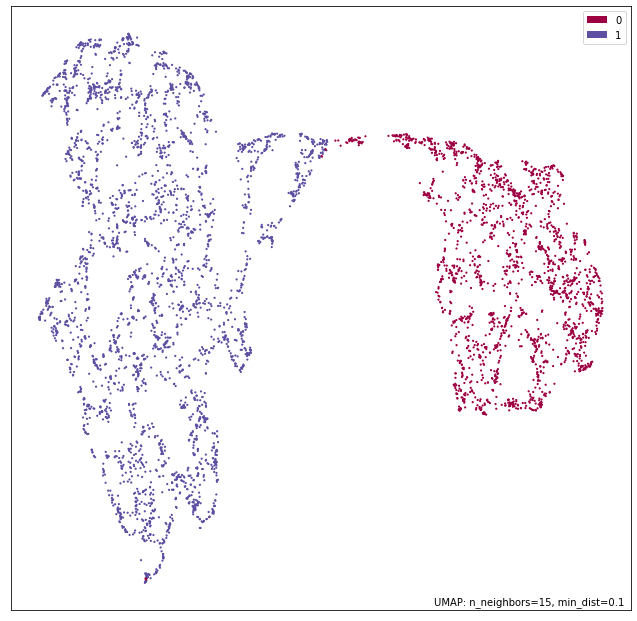

In [33]:
# selected features without Type
df_copy4 = df[['Alcohol', 'Eligibility', 'FA', 'CA', 'VA']].copy()

mapper = umap.UMAP().fit(df_copy4)
umap.plot.points(mapper, labels=df_copy4.Eligibility)
plt.show()

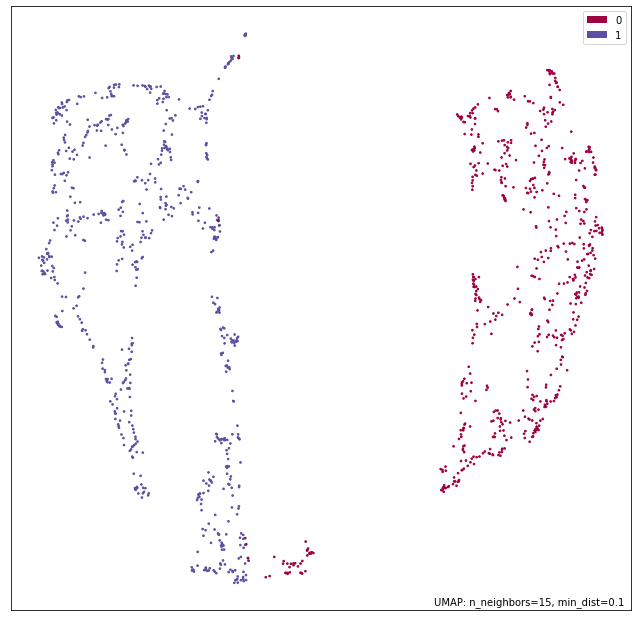

In [34]:
# red wine
df_copy5 = df_red[['Alcohol', 'Eligibility', 'FA', 'CA', 'VA']].copy()

mapper = umap.UMAP().fit(df_copy5)
umap.plot.points(mapper, labels=df_copy5.Eligibility)
plt.show()

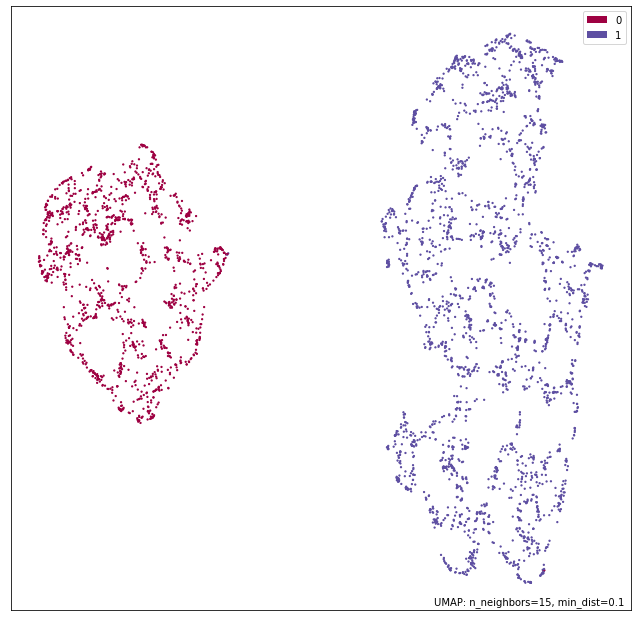

In [35]:
# white wine
df_copy6 = df_white[['Alcohol', 'Eligibility', 'FA', 'CA', 'VA']].copy()

mapper = umap.UMAP().fit(df_copy6)
umap.plot.points(mapper, labels=df_copy6.Eligibility)
plt.show()

Actually it's better, so the original features might influence the result. I know little about PCA so let's learn this later.

In [36]:
# classify wine type
df_copy7 = df[['Alcohol', 'FA', 'CA', 'VA', 'Type']].copy()
df_copy7.Type = df.Type.replace(to_replace=['R', 'W'], value=[0, 1])

mapper = umap.UMAP().fit(df_copy7)
umap.plot.points(mapper, labels=df_copy7.Type)
plt.show()

With selected features, the classification capability increased a lot. And we have an unexpected gift. **We can use alcohol and acidity to classify different types of wines!** So there might be an assumption that red wine and white wine are different because they have different component contents. Thus, they may have different criteria for quality. Maybe we should not combine the red wine and white wine.

## 5. Discussion

We use wine quality dataset here to practice the data preparation, exploration, and visualization skills.

There are some small conclusions deduced from our work:
* Alcohol content is positively related with quality, higher alcohol content normally brings higher quality.
* Free sulfur dioxide is positively related with total sulfur dioxide, while density is negatively related with alcohol. These are highly correlated features and can be selected to drop.
* Features can be used to classify different types of wines.

There are some unfinished thoughts (some are limited by skills):
* Simply dividing quality into eligibility might not be a good thought, this problem should be treated as a regression task.
* Since alcohol, acidity, sugar should have a synchronous effect on quality. Maybe we can draw a 3-D plot with acidity and sugar as x, y axis and quality as z axis to see the trend.
* Maybe we should drop those outliers and this can make our result better.


## Reference

UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Wine+Quality

When Cheap Wine Just Isn't Worth It https://www.thedailymeal.com/drink/when-cheap-wine-just-isnt-worth-it

Modeling wine preferences by data mining from physicochemical properties https://doi.org/10.1016/j.dss.2009.05.016

The six attributes of quality in wine https://wineandotherstories.com/the-six-attributes-of-quality-in-wine/

Correlation Concepts, Matrix & Heatmap using Seaborn https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/

Wine consumption worldwide in 2020, by country (in million hectoliters) https://www.statista.com/statistics/858743/global-wine-consumption-by-country/

UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction https://arxiv.org/pdf/1802.03426.pdf